In [1]:
import torch
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np

import json
import time

In [2]:
with open("config.json") as f:
    cfg = json.load(f)

print(cfg)
sintel = tv.datasets.Sintel(cfg["sintel"])

{'flying_chairs': 'C:\\Datasets', 'flying_things_3d': 'C:\\Datasets', 'sintel': 'C:\\Datasets'}


In [3]:
sintel

Dataset Sintel
    Number of datapoints: 1041
    Root location: C:\Datasets

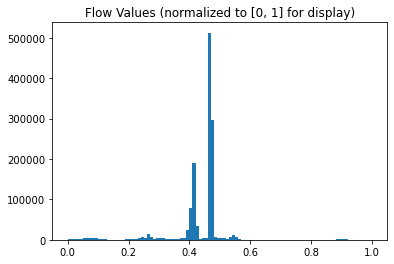

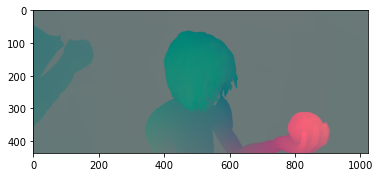

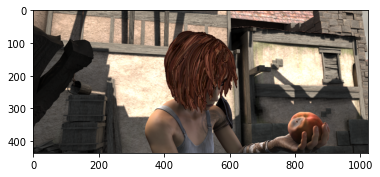

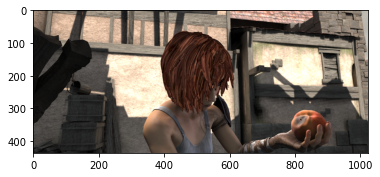

In [10]:
%matplotlib inline
# for visualizing flow, add a dummy dimension for the third rgb channel
def get_flow_im(flow):
    flow_im = np.concatenate([flow, np.zeros((1, *flow.shape[1:]))], axis=0)
    flow_im = np.transpose(flow_im, (1, 2, 0))

    xdim, ydim, _ = flow_im.shape
    # normalize horizontal and vertical flows by their respective image dimensions
    flow_im[:, :, 0] = flow_im[:, :, 0] / xdim
    flow_im[:, :, 1] = flow_im[:, :, 1] / ydim

    # normalize to between one and 0 for image display, this is NOT to be done with the training data
    flow_im -= flow_im.min()
    flow_im /= flow_im.max()

    return flow_im
    
    
    
im1, im2, flow = sintel[8]

flow_im = get_flow_im(flow)
plt.hist(flow_im.flatten(), bins=100)  # for visualizing the distribution of values, just for troubleshooting
plt.title("Flow Values (normalized to [0, 1] for display)")
plt.show()
plt.imshow(flow_im)
plt.show()

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

(436, 1024, 3)


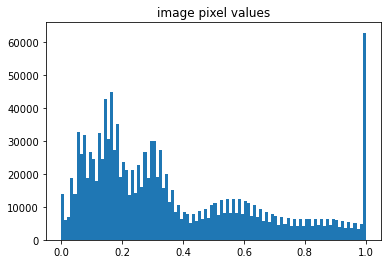

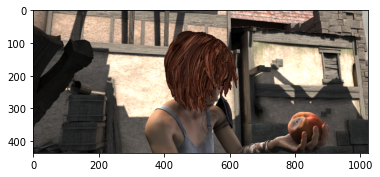

In [11]:
%matplotlib inline
# for extracting the input images, converting them to numpy arrays and normalizing their values
b = np.array(im1.getdata())
b = np.array(b)
b = b.reshape([im1.size[1], im1.size[0], 3])
# b = np.transpose(b, (1,2,0))
b = b.astype(int)
b = b/255
print(b.shape)
plt.hist(b.flatten(), bins=100)
plt.title("image pixel values")
plt.show()
plt.imshow(b)
plt.show()

In [13]:
# displaying an animation
%matplotlib auto
IND = 2  # 0 for im1, 1 for im2, 2 for flow
try:
    for i in range(len(sintel)):
        ims = sintel[i]
        im = ims[IND]

        if IND == 2:
            im = get_flow_im(im)

        plt.imshow(im)
        plt.draw()
        plt.pause(1/120)
        plt.clf()
except:  # use thhe keyboard interrupt to terminate
    pass
    

Using matplotlib backend: TkAgg
